# ANN - Clasificación Titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura de Datos

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Limpieza de Datos

In [6]:
df[['Age']] = df[['Age']].fillna(value=df[['Age']].mean())
df[['Fare']] = df[['Fare']].fillna(value=df[['Fare']].mean())
df[['Embarked']] = df[['Embarked']].fillna(value=df['Embarked'].value_counts().idxmax())

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Planteamiento del modelo

In [8]:
X = df[['Age','Sex','Fare','Pclass', 'SibSp',	'Parch']]
y = df['Survived']

## Preprocesamiento

Haremos lo siguiente:


*   Binarización
*   Escalamiento
*   Hot encoding Y



### Variables Dummy (binarización)

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
X.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male
0,22.0,7.2500,3,1,0,1
1,38.0,71.2833,1,1,0,0
2,26.0,7.9250,3,0,0,0
3,35.0,53.1000,1,1,0,0
4,35.0,8.0500,3,0,0,1


### Escalamiento

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_enc = scaler.fit_transform(X)

In [13]:
X_enc[:2]

array([[-0.5924806 , -0.50244517,  0.82737724,  0.43279337, -0.47367361,
         0.73769513],
       [ 0.63878901,  0.78684529, -1.56610693,  0.43279337, -0.47367361,
        -1.35557354]])

### One hot Y

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
enc = OneHotEncoder()

In [16]:
y_enc = enc.fit_transform(y.values.reshape(-1,1)).toarray()

In [17]:
y_enc[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

### Validacion Cruzada

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.33, random_state=42)

### Arquitectura de la red neuronal

La arquitectura es un arte. En este caso, utilizaremos capas densas (fully connected)

*  Probar con activation: relu, tanh, linear
*  Probar optimizadores: Adam, SGD, RMSProp, Adagrad
*  Probar combinaciones de capas

In [20]:
import tensorflow

In [21]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
model.add( Input(shape=(6,)) )
model.add( Dense(20, activation='linear') )
model.add( Dense(10, activation='linear') )
model.add( Dense(2, activation='softmax') )

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Visualización del modelo

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 372 (1.45 KB)
Trainable params: 372 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
from tensorflow.keras.utils import plot_model

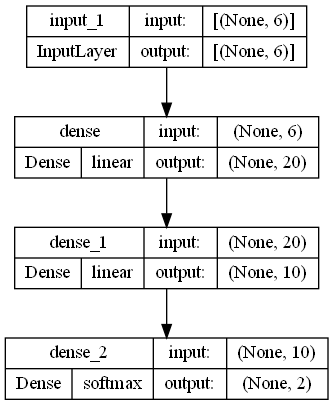

In [26]:
plot_model(model, show_shapes=True, show_layer_activations=True)

### Entrenamiento

In [27]:
history = model.fit(X_train, y_train,
                    batch_size=128, epochs=50,
                    validation_data=(X_test,y_test) )

Epoch 1/50
5/5 [==============================] - 1s 71ms/step - loss: 0.9293 - accuracy: 0.2215 - val_loss: 0.8517 - val_accuracy: 0.2237
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.8160 - accuracy: 0.2450 - val_loss: 0.7570 - val_accuracy: 0.5153
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.7328 - accuracy: 0.5352 - val_loss: 0.6863 - val_accuracy: 0.6305
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6713 - accuracy: 0.6342 - val_loss: 0.6329 - val_accuracy: 0.6814
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6255 - accuracy: 0.6862 - val_loss: 0.5930 - val_accuracy: 0.7153
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5913 - accuracy: 0.7282 - val_loss: 0.5615 - val_accuracy: 0.7729
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5647 - accuracy: 0.7651 - val_loss: 0.5372 - val_accuracy: 0.7966
Epoch 8/50
5/5 [===========

## Evaluación

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [30]:
y_pred[:5]

array([[0.91507435, 0.08492568],
       [0.7660573 , 0.23394264],
       [0.84418064, 0.15581934],
       [0.11334997, 0.88664997],
       [0.32193482, 0.67806524]], dtype=float32)

In [1]:



y_pred_clases = np.argmax(y_pred, axis=1)

NameError: name 'np' is not defined

In [32]:
accuracy_score(y_test_clase,y_pred_clase)

0.8169491525423729

## Evolución del entrenamiento

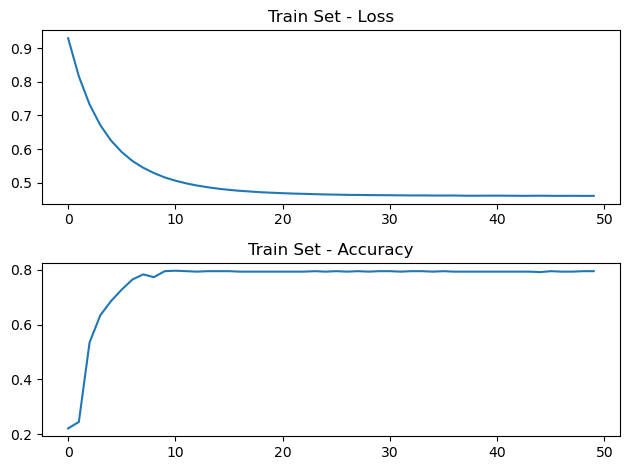

In [33]:
plt.subplot(2,1,1)
plt.title('Train Set - Loss')
plt.plot(history.history['loss'])
plt.subplot(2,1,2)
plt.title('Train Set - Accuracy')
plt.plot(history.history['accuracy'])
plt.tight_layout()

In [ ]:
# train set

In [ ]:
# validation set


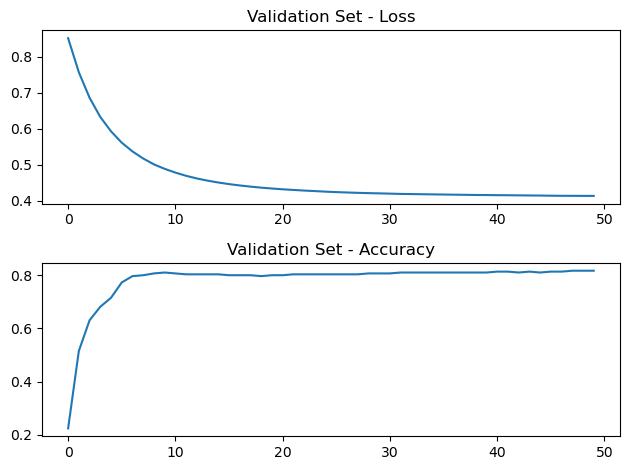

In [34]:
plt.subplot(2,1,1)
plt.title('Validation Set - Loss')
plt.plot(history.history['val_loss'])
plt.subplot(2,1,2)
plt.title('Validation Set - Accuracy')
plt.plot(history.history['val_accuracy'])
plt.tight_layout()